<a href="https://colab.research.google.com/github/shreerampawar/YBIF/blob/main/DA_I2_Project_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

**Hand Written Digit Prediction Model**

## **Objective**

Preparing a Machine Learning model using the method of Linear Regression.

## **Data Source**

This dataset was taken from the YBI Foundation's Github page where public datasets are present.

## **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

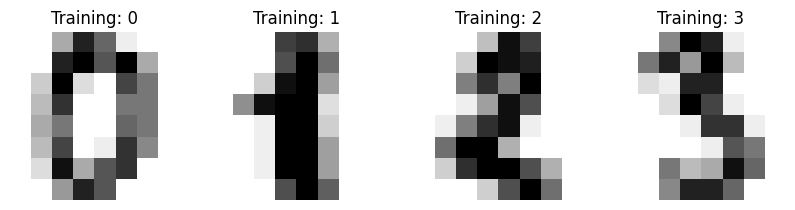

In [6]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

## **Data Preprocessing**

 **Flatten Image**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0].shape

(64,)

In [13]:
data.shape

(1797, 64)

## **Scaling Data**

In [14]:
data.min()

0.0

In [15]:
data.max()

16.0

In [16]:
data = data/16

In [17]:
data.min()

0.0

In [18]:
data.max()

1.0

In [19]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.3)

In [22]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

**Train or Fit Model**

In [25]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

## **Prediction**

**Predict test data**

In [26]:
y_pred = rf.predict(xtest)

In [27]:
y_pred

array([6, 1, 2, 9, 7, 1, 8, 4, 0, 4, 9, 8, 8, 6, 0, 4, 8, 7, 7, 9, 8, 2,
       9, 7, 5, 1, 0, 0, 0, 9, 1, 4, 9, 3, 5, 6, 9, 3, 0, 5, 9, 0, 5, 6,
       7, 4, 9, 4, 9, 7, 8, 2, 6, 5, 3, 7, 4, 3, 5, 0, 6, 0, 5, 1, 5, 5,
       1, 3, 5, 6, 8, 3, 1, 4, 7, 1, 1, 9, 6, 5, 6, 3, 0, 8, 0, 3, 3, 5,
       3, 6, 4, 7, 7, 0, 0, 0, 6, 1, 7, 1, 7, 3, 8, 5, 9, 8, 6, 4, 4, 8,
       4, 4, 4, 6, 1, 0, 0, 7, 7, 1, 6, 2, 6, 7, 9, 4, 7, 4, 0, 2, 8, 1,
       0, 3, 1, 9, 1, 9, 3, 2, 8, 5, 7, 0, 9, 4, 3, 6, 5, 3, 4, 1, 5, 0,
       4, 5, 6, 3, 0, 1, 4, 9, 6, 8, 9, 7, 9, 1, 9, 0, 5, 9, 6, 5, 3, 1,
       6, 8, 8, 5, 9, 5, 8, 3, 4, 9, 0, 4, 0, 3, 5, 6, 2, 6, 4, 3, 8, 5,
       7, 0, 5, 0, 7, 7, 7, 0, 8, 4, 0, 4, 2, 1, 5, 0, 9, 2, 4, 1, 3, 2,
       5, 1, 4, 3, 8, 9, 6, 5, 7, 2, 1, 9, 4, 2, 4, 2, 1, 4, 7, 7, 9, 2,
       2, 6, 3, 0, 3, 2, 7, 6, 4, 9, 7, 6, 5, 2, 2, 4, 8, 1, 8, 4, 0, 3,
       4, 0, 0, 8, 9, 8, 4, 1, 1, 4, 1, 0, 6, 7, 1, 6, 2, 8, 3, 7, 9, 1,
       5, 0, 0, 4, 5, 0, 7, 9, 9, 6, 8, 8, 9, 1, 9,

## **Model Evaluation**

**Model Accuracy**

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(ytest, y_pred)

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 1,  2,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 58,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0,  0, 49]])

In [30]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.89      0.98      0.93        50
           2       1.00      0.98      0.99        45
           3       1.00      0.96      0.98        55
           4       0.98      1.00      0.99        52
           5       0.98      0.98      0.98        60
           6       1.00      0.94      0.97        53
           7       0.96      0.98      0.97        52
           8       1.00      0.95      0.97        61
           9       0.92      0.94      0.93        52

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## **Explaination**

Digit recognition, also known as Handwritten Digit Prediction or Digit Classification, involves instructing a computer to interpret and comprehend handwritten numerical characters in a manner similar to our own recognition abilities. Picture having a collection of images, each depicting a handwritten digit ranging from 0 to 9. The objective is to educate the computer on how to analyze these images and determine the specific digit in each one. The images are segregated into two sets: one for educating the computer (training set) and another for evaluating its proficiency (testing set). We employ an intelligent approach, akin to a specialized problem-solving technique, to enable the computer to grasp the patterns and distinctions present in the images. While it learns, we provide guidance by indicating the accuracy of its estimations. After achieving proficiency in this capability, we present it with fresh images it hasn't encountered during training, and it endeavors to make accurate predictions regarding the digits. We evaluate its predictions to gauge its performance, utilizing uncomplicated assessments to verify the correctness of its responses. This undertaking aids in the development of a computer with the ability to recognize handwritten digits, which has real-world applications such as reading zip codes or assisting computers in comprehending human handwriting. Essentially, it entails instructing the computer in the art of reading handwritten content.